In [3]:
import sys, os
cwd = os.getcwd()
sys.path.append(cwd + '/../.') 

import numpy as np
from sklearn.linear_model import LogisticRegression
from src.training_loop import SKLearnActiveLearner, KerasActiveLearner
from matplotlib import pyplot as plt
import pandas as pd

def getXtrain(): return np.load('./../encodings/app_store_sbert_%s_X_train.npy' % i ).tolist()
def getytrain(): return np.load('./../encodings/app_store_sbert_%s_y_train.npy' % i).tolist()
def np_flatten(x, dtype=None): return np.array(x, dtype=dtype)

used_index_meta_list = []
n = 5

save_and_repeat = 1
al_steps = 30
sample_size_per_step = 10    

In [4]:
#df = pd.DataFrame(columns=['iter', 'f1_mic', 'f1_mac', 'n', 'c', 't_train', 't_inf'])

In [5]:
import copy

f1_mic_list = []
f1_mac_list = []
precision_list = []
recall_list = []
c_list = []
times_train_list = []
times_inf_list = []


for i in range(n):
        
        print('Start Model %s ...' % i)
        
        # load data
        X_train = getXtrain()
        X_test = np.load('./../encodings/app_store_sbert_%s_X_test.npy' % i)
        y_train = getytrain()
        y_test = np.load('./../encodings/app_store_sbert_%s_y_test.npy' % i)

        train_idx = [i for i in range(len(X_train))]

        used_index_list = []
        
        al = SKLearnActiveLearner(10, getXtrain(), getytrain(), X_test, y_test, train_idx, LogisticRegression, {'random_state':0})
        
        al.run_warmstart()
        print('__ End Warmstart')
        
        for i in range(save_and_repeat):
            f1_mic, f1_mac, precision, recall, c, times_train, times_inf = al.run_active_learning(al_steps, sample_size_per_step)
            
            print('__ Checkpoint: Save Data')
            
            # get selected data
            used_index = al.get_training_index()
            
            used_index_list.append(used_index[:]) # deep copy
        
        f1_mic_list.append(f1_mic)
        f1_mac_list.append(f1_mac)
        precision_list.append(precision)
        recall_list.append(recall)
        c_list.append(c)
        times_train_list.append(times_train)
        times_inf_list.append(times_inf)
            
        used_index_meta_list.append(used_index_list)
        
        
        

        print('Done')
        print()

Start Model 0 ...
#1  f1_mic: 0.71965, f1_mac: 0.67577, prec: -1, rec: -1, n: 30, c : [(2, 10), (1, 10), (0, 10)], t_train: 0.0828, t_inf: 0.0146
__ End Warmstart
#2  f1_mic: 0.74468, f1_mac: 0.59238, prec: -1, rec: -1, n: 40, c : [(2, 16), (1, 13), (0, 11)], t_train: 0.0141, t_inf: 0.0346
#3  f1_mic: 0.75594, f1_mac: 0.66299, prec: -1, rec: -1, n: 50, c : [(2, 19), (0, 16), (1, 15)], t_train: 0.0164, t_inf: 0.0074
#4  f1_mic: 0.74875, f1_mac: 0.62381, prec: -1, rec: -1, n: 60, c : [(2, 24), (1, 18), (0, 18)], t_train: 0.0168, t_inf: 0.0073
#5  f1_mic: 0.7694, f1_mac: 0.65079, prec: -1, rec: -1, n: 70, c : [(2, 25), (1, 25), (0, 20)], t_train: 0.0204, t_inf: 0.0073
#6  f1_mic: 0.76502, f1_mac: 0.62936, prec: -1, rec: -1, n: 80, c : [(2, 29), (1, 29), (0, 22)], t_train: 0.0349, t_inf: 0.0352
#7  f1_mic: 0.76846, f1_mac: 0.66763, prec: -1, rec: -1, n: 90, c : [(1, 33), (2, 30), (0, 27)], t_train: 0.0261, t_inf: 0.0063
#8  f1_mic: 0.76971, f1_mac: 0.6891, prec: -1, rec: -1, n: 100, c : [(

In [6]:
import os

save_dir = './app_store_sbert'

if not os.path.isdir(save_dir):
    os.mkdir(save_dir)

In [7]:
np.save('%s/f1_micro' % save_dir, f1_mic_list)
np.save('%s/f1_macro' % save_dir, f1_mac_list)
np.save('%s/class_distributions' % save_dir, c_list)
np.save('%s/times_training' % save_dir, times_train_list)
np.save('%s/times_inference' % save_dir, times_inf_list)
np.save('%s/used_training_index' % save_dir, used_index_meta_list)

In [ ]:
f1_mic_list = []
f1_mac_list = []
precision_list = []
recall_list = []
c_list = []
times_train_list = []
times_inf_list = []

In [73]:
#import pandas as pd
#df = pd.DataFrame(columns=['iter', 'f1_mic', 'f1_mac', 'n', 'c', 't_train', 't_inf'])

In [71]:
#df = df.append({'A':1, 'B':5, 'C':4}, ignore_index=True)

In [4]:
#df

In [5]:
f1_mic

[0.74687, 0.77284, 0.79725, 0.81539, 0.82165, 0.82071, 0.82728]

In [6]:
np.array(f1_mic_list).mean(axis=0), np.array(f1_mic_list).std(axis=0)

(array([0.725156, 0.747058, 0.795744, 0.812576, 0.818146, 0.821462,
        0.825594]),
 array([0.04391634, 0.0344166 , 0.00454607, 0.00400492, 0.00536719,
        0.00417371, 0.00373017]))

In [7]:
np.array(times_train_list).mean(axis=0), np.array(times_train_list).std(axis=0)

(array([0.03465714, 0.04138173, 0.05518009, 0.05884732, 0.0840723 ,
        0.08502895, 0.12265593]),
 array([0.02614077, 0.0318853 , 0.03486923, 0.0167171 , 0.02770926,
        0.00895526, 0.02884097]))

In [8]:
np.array(times_inf_list).mean(axis=0), np.array(times_inf_list).std(axis=0)

(array([0.00844313, 0.00734673, 0.01636317, 0.01078033, 0.00665261,
        0.01635642, 0.01648517]),
 array([0.0022227 , 0.00175227, 0.01966757, 0.00840542, 0.00037863,
        0.01970948, 0.02017543]))

In [8]:
import matplotlib.pyplot as plt

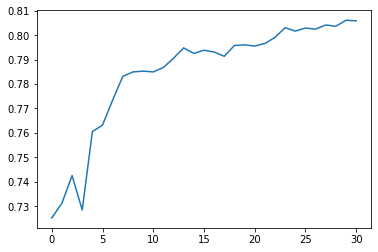

In [9]:
plt.plot(np.array(f1_mic_list).mean(axis=0))

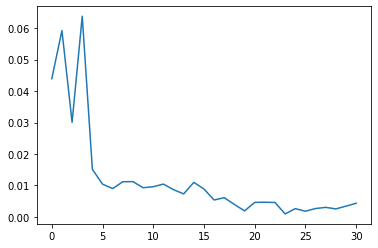

In [10]:
plt.plot(np.array(f1_mic_list).std(axis=0))

In [14]:
idx = np.array(used_index_meta_list).shape
for i in range(idx[0]):
    print(len(used_index_meta_list[0][0]))
    print(len(used_index_meta_list[0][1]))

330
630
330
630
330
630
330
630
330
630


/tmp/ipykernel_664/51068041.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  idx = np.array(used_index_meta_list).shape


In [12]:
len(used_index_meta_list)

5